In [132]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']


['AppleGothic']

In [2]:
df= pd.read_csv('../01.Data_Collection/screen_show_seat_updated.csv')

In [20]:
df.shape

(58814, 17)

헷갈리지 않기 위한 용어 정리
- 좌석판매율 계산법: 관객수(실제 티켓구매한 관객)/좌석수(스케줄에 잡힌 좌석수)
e.g. (751754/964153)*100
- 스크린점유율: 해당 집계일의 영화스크린수/총 스크린수
- 좌석점유율: 해당 집계일의 영화좌석수/총 좌석수
- 상영점유율: 해당 집계일의 영화상영횟수/총 상영횟수
- 총 갯수는 해외영화 포함이므로 해당 점유율은 정확하지 않고 직접 계산해야 할 수 있음

In [21]:
df.head()

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
0,1,국제시장,2014-12-17,941,35.8%,6129982500,47219550096,751754,6097431,2015-01-01,1,78.0%,34.99%,964153,1,4650,45.651%
1,2,"님아, 그 강을 건너지 마오",2014-11-27,473,18.0%,1479015600,31324845079,178941,4025319,2015-01-01,3,67.2%,9.66%,266197,2,1979,19.429%
2,3,기술자들,2014-12-24,464,17.7%,1299883700,14952363848,160371,1938454,2015-01-01,2,57.9%,10.05%,276896,3,1886,18.516%
3,4,상의원,2014-12-24,258,9.8%,230484800,5524209364,28439,705071,2015-01-01,5,46.6%,2.22%,61095,5,491,4.82%
4,5,개를 훔치는 완벽한 방법,2014-12-31,196,7.5%,299346400,608002300,37741,80633,2015-01-01,4,48.1%,2.85%,78410,4,650,6.381%


In [22]:
#좌석판매율 계산법: 관객수(실제 티켓구매한 관객)/좌석수(스케줄에 잡힌 좌석수)
(751754/964153)*100
# 스크린점유율: 해당 집계일의 영화스크린수/총 스크린수
# 좌석점유율: 해당 집계일의 영화좌석수/총 좌석수

77.97040511205172

In [23]:
df.isnull().sum()

스크린점유율순위        0
영화명             0
개봉일          5515
스크린수            0
스크린점유율          0
매출액             0
누적매출액           0
관객수             0
누적관객수           0
점유율집계일          0
좌석판매점유율순위       0
좌석판매율           0
좌석점유율           0
좌석수             0
순위              0
상영횟수            0
상영점유율           0
dtype: int64

In [28]:
df['영화명'].nunique()

4672

In [24]:
print(df[df['개봉일'].isnull()]['영화명'].nunique(), '건의 영화가 개봉일이 없음')
print(df['점유율집계일'].nunique(),'일의 수집')

1781 건의 영화가 개봉일이 없음
1771 일의 수집


In [25]:
pd.DataFrame(df[df['개봉일'].isnull()]['영화명'].unique())

,0
0,뽀로로 극장판 눈요정 마을 대모험
1,민우씨 오는 날
2,2015 우수 단편영화 상영 01
3,고종황제와 의사 안중근
4,1월 단편 상상극장 – 맛있게 먹겠습니다
5,맨발의 청춘
6,떠날 때는 말없이
7,2015 우수 단편영화 상영 02
8,독립영화발표회(251회) - 박영석 프로그래머 추천전
9,도도하라


개봉일 없는 영화들: 거의 영화제 작품, 단편, 인디작품 등
- 이것들의 매출액 순위 봐도 좋을듯. 중요한건 추가할 수 있으니까
film inner join 해서 뺄 수 있음.
list 뽑고 isin 해보기

In [17]:
df.head(30)

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
0,1,국제시장,2014-12-17,941,35.8%,6129982500,47219550096,751754,6097431,2015-01-01,1,78.0%,34.99%,964153,1,4650,45.651%
1,2,"님아, 그 강을 건너지 마오",2014-11-27,473,18.0%,1479015600,31324845079,178941,4025319,2015-01-01,3,67.2%,9.66%,266197,2,1979,19.429%
2,3,기술자들,2014-12-24,464,17.7%,1299883700,14952363848,160371,1938454,2015-01-01,2,57.9%,10.05%,276896,3,1886,18.516%
3,4,상의원,2014-12-24,258,9.8%,230484800,5524209364,28439,705071,2015-01-01,5,46.6%,2.22%,61095,5,491,4.82%
4,5,개를 훔치는 완벽한 방법,2014-12-31,196,7.5%,299346400,608002300,37741,80633,2015-01-01,4,48.1%,2.85%,78410,4,650,6.381%
5,6,더 테너 리리코 스핀토,2014-12-31,169,6.4%,69620500,200984700,8446,26316,2015-01-01,6,18.9%,1.63%,44800,6,367,3.603%
6,7,뽀로로 극장판 눈요정 마을 대모험,NaN,66,2.5%,27846600,1188395900,5561,237436,2015-01-01,7,51.8%,0.39%,10741,7,83,0.815%
7,8,쿼바디스,2014-12-10,12,0.5%,4046900,117029800,509,15399,2015-01-01,9,24.6%,0.08%,2073,8,19,0.187%
8,9,목숨,2014-12-04,10,0.4%,1399500,275635600,179,35844,2015-01-01,10,9.8%,0.07%,1835,10,10,0.098%
9,10,그 사람 그 사랑 그 세상,2014-11-20,7,0.3%,9467000,162552500,1202,22070,2015-01-01,8,45.9%,0.1%,2621,9,14,0.137%


In [ ]:
df[df['개봉일'].isnull()]['영화명'].unique()

In [44]:
print(df.groupby('점유율집계일').count().min())
print(df.groupby('점유율집계일').count().max())
#하루당 최저 13개에서 76개까지 영화 있음

스크린점유율순위     1
영화명          1
개봉일          1
스크린수         1
스크린점유율       1
매출액          1
누적매출액        1
관객수          1
누적관객수        1
좌석판매점유율순위    1
좌석판매율        1
좌석점유율        1
좌석수          1
순위           1
상영횟수         1
상영점유율        1
dtype: int64
스크린점유율순위     51
영화명          51
개봉일          51
스크린수         51
스크린점유율       51
매출액          51
누적매출액        51
관객수          51
누적관객수        51
좌석판매점유율순위    51
좌석판매율        51
좌석점유율        51
좌석수          51
순위           51
상영횟수         51
상영점유율        51
dtype: int64


In [45]:
left =pd.DataFrame(df.groupby(['점유율집계일'])['매출액'].max()).reset_index()

In [46]:
left

,점유율집계일,매출액
0,2015-01-01,374600
1,2015-01-05,4848000
2,2015-01-06,9901000
3,2015-01-07,110945200
4,2015-01-08,118878700
5,2015-01-09,147902786
6,2015-01-10,247568693
7,2015-01-11,228749100
8,2015-01-12,95607300
9,2015-01-13,93500700


In [29]:
right =df[['매출액','영화명']]

In [30]:
top_movie_per_day =left.merge(right, on='매출액', how='inner')

In [31]:
top_movie_per_day.head()

,점유율집계일,매출액,영화명
0,2015-01-01,6129982500,국제시장
1,2015-01-02,3782877729,국제시장
2,2015-01-03,5102642636,국제시장
3,2015-01-04,4437089200,국제시장
4,2015-01-05,1558134100,국제시장


In [32]:
print(top_movie_per_day['영화명'].nunique(),'개의 영화가 1등을 함')

148 개의 영화가 1등을 함


매출액 1등한 영화들과 그 횟수

기생충	43회

In [48]:
top_movie_per_day.groupby('영화명').count().sort_values(by='매출액',ascending=False )

,점유율집계일,매출액
영화명,,
기생충,43,43
베테랑,42,42
터널,28,28
마스터,28,28
럭키,28,28
극한직업,28,28
마녀,27,27
내부자들,27,27
연평해전,27,27


그외에도 1등한 영화들의 좌석점유율을 보자

In [38]:
print(df['매출액'].describe())
print(df['스크린수'].describe())
print(df['관객수'].describe())
print(df['상영횟수'].describe())

count         58814.000000
mean       75609599.824345
std       432625638.630901
min               0.000000
25%           33000.000000
50%          258000.000000
75%         2008425.000000
max     12779805288.000000
Name: 매출액, dtype: float64
count   58814.000000
mean       72.058438
std       208.897073
min         1.000000
25%         1.000000
50%         2.000000
75%        13.000000
max      2235.000000
Name: 스크린수, dtype: float64
count     58814.000000
mean       9377.951661
std       52335.847436
min           0.000000
25%           6.000000
50%          45.000000
75%         293.750000
max     1466225.000000
Name: 관객수, dtype: float64
count   58814.000000
mean      248.952018
std       904.884958
min         1.000000
25%         1.000000
50%         3.000000
75%        16.000000
max     11159.000000
Name: 상영횟수, dtype: float64


### df 상관관계 보기

In [49]:
df.corr()

,스크린점유율순위,스크린수,매출액,누적매출액,관객수,누적관객수,좌석판매점유율순위,좌석수,순위,상영횟수
스크린점유율순위,1.000000,-0.531943,-0.293175,-0.159193,-0.299962,-0.155742,0.855556,-0.419352,0.961108,-0.448790
스크린수,-0.531943,1.000000,0.761512,0.260300,0.772723,0.254467,-0.460755,0.945593,-0.508281,0.969637
매출액,-0.293175,0.761512,1.000000,0.185840,0.997437,0.182135,-0.252811,0.835485,-0.278775,0.821185
누적매출액,-0.159193,0.260300,0.185840,1.000000,0.189001,0.998709,-0.134599,0.222886,-0.147293,0.231285
관객수,-0.299962,0.772723,0.997437,0.189001,1.000000,0.185609,-0.258759,0.847449,-0.285300,0.832419
누적관객수,-0.155742,0.254467,0.182135,0.998709,0.185609,1.000000,-0.131312,0.218108,-0.143992,0.226021
좌석판매점유율순위,0.855556,-0.460755,-0.252811,-0.134599,-0.258759,-0.131312,1.000000,-0.362295,0.899430,-0.387776
좌석수,-0.419352,0.945593,0.835485,0.222886,0.847449,0.218108,-0.362295,1.000000,-0.399593,0.993401
순위,0.961108,-0.508281,-0.278775,-0.147293,-0.285300,-0.143992,0.899430,-0.399593,1.000000,-0.427990
상영횟수,-0.448790,0.969637,0.821185,0.231285,0.832419,0.226021,-0.387776,0.993401,-0.427990,1.000000


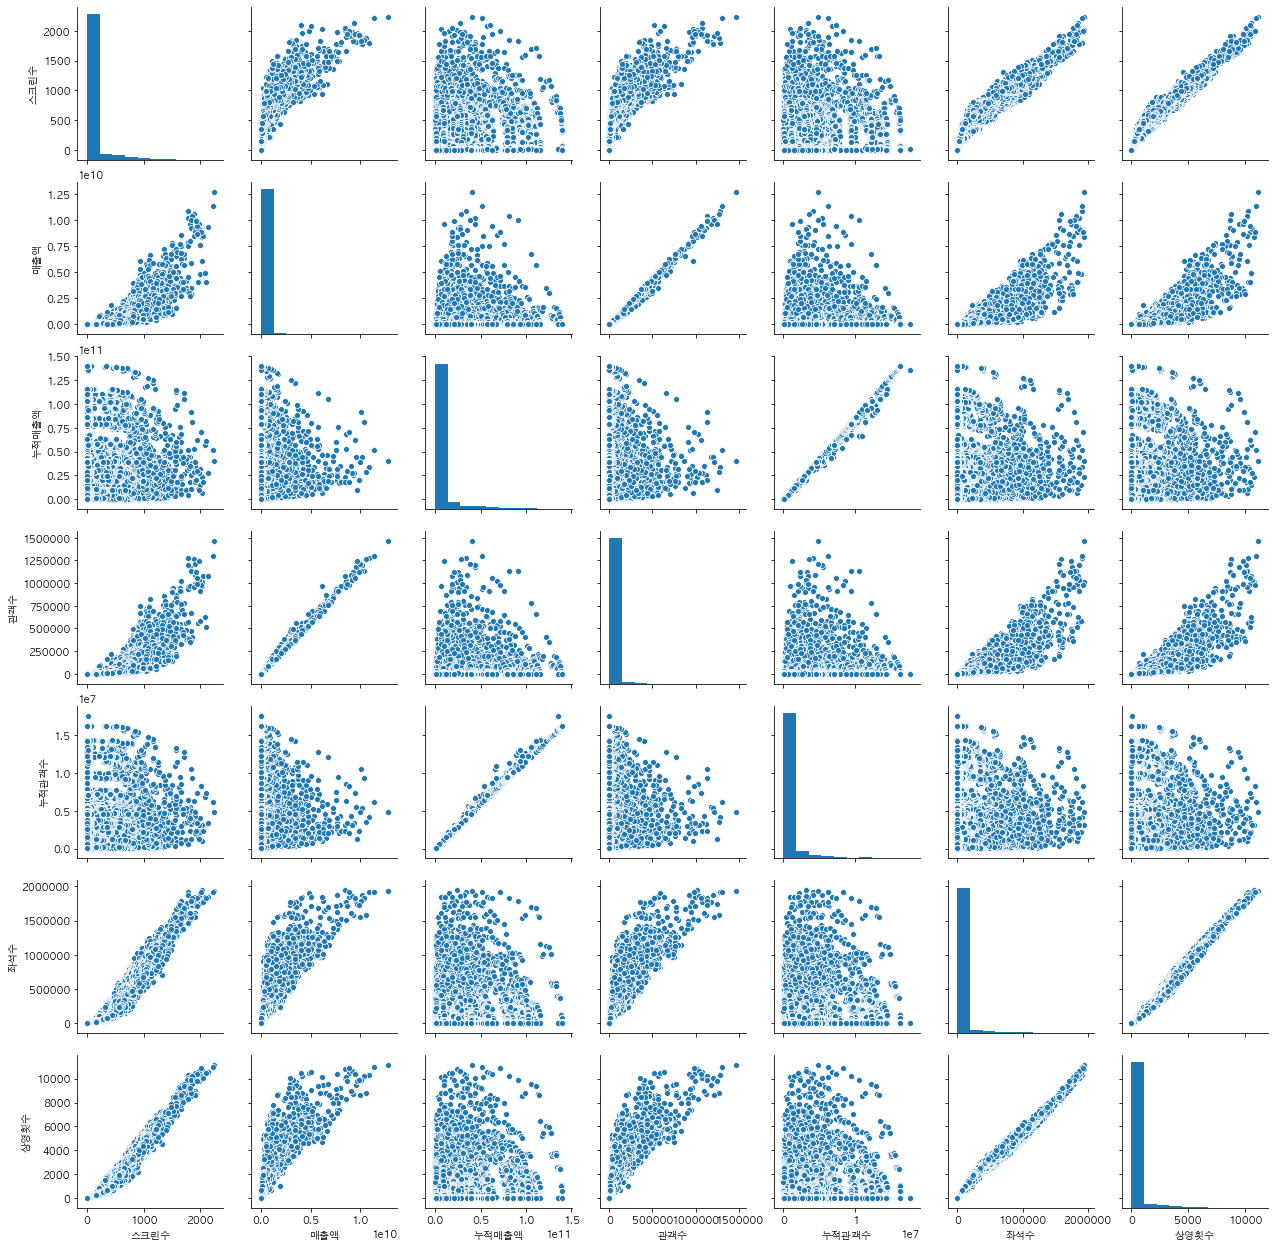

In [98]:
sns.pairplot(data =df_nan)

In [3]:
df_nan = df[['스크린수','매출액', '누적매출액', '관객수',
       '누적관객수', '좌석수','상영횟수']]

In [79]:
df_nan.dtypes

스크린수     int64
매출액      int64
누적매출액    int64
관객수      int64
누적관객수    int64
좌석수      int64
상영횟수     int64
dtype: object

In [76]:
df_nan.astype(float)

KeyboardInterrupt: 

In [4]:
df_nan.head()

,스크린수,매출액,누적매출액,관객수,누적관객수,좌석수,상영횟수
0,941,6129982500,47219550096,751754,6097431,964153,4650
1,473,1479015600,31324845079,178941,4025319,266197,1979
2,464,1299883700,14952363848,160371,1938454,276896,1886
3,258,230484800,5524209364,28439,705071,61095,491
4,196,299346400,608002300,37741,80633,78410,650


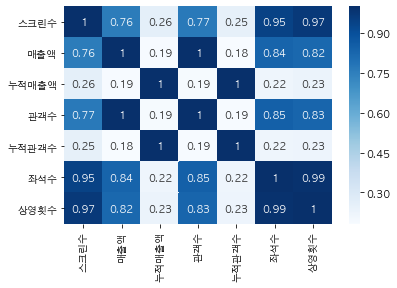

In [94]:
sns.heatmap(df_nan.corr(), annot=True, cmap='Blues')

누적은 낮은 상관관계(누적이 높아도 그날 관객수는 적은 상황이 많으니까)

- 매출액 상관: 관객수1>좌석수0.84>상영횟수0.82>스크린수0.76 순임
- 스크린수 상관:상영횟수(0.97)>좌석수(0.95)>관객수0.77>매출액0.76 순
- 관객수 상관: 매출액1>좌석수0.85>상영횟수0.83>스크린수0.77 순
- 좌석수 상관: 상영횟수0.99>스크린수0.95>관객수0.85>매출액0.84순
- 상영횟수상관: 좌석수0.99>스크린수0.97>관객수0.83>매출액0.82 순

매출액-관객수 / 좌석수-상영횟수-스크린수 가 붙어있음

In [5]:
df.head()

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
0,1,국제시장,2014-12-17,941,35.8%,6129982500,47219550096,751754,6097431,2015-01-01,1,78.0%,34.99%,964153,1,4650,45.651%
1,2,"님아, 그 강을 건너지 마오",2014-11-27,473,18.0%,1479015600,31324845079,178941,4025319,2015-01-01,3,67.2%,9.66%,266197,2,1979,19.429%
2,3,기술자들,2014-12-24,464,17.7%,1299883700,14952363848,160371,1938454,2015-01-01,2,57.9%,10.05%,276896,3,1886,18.516%
3,4,상의원,2014-12-24,258,9.8%,230484800,5524209364,28439,705071,2015-01-01,5,46.6%,2.22%,61095,5,491,4.82%
4,5,개를 훔치는 완벽한 방법,2014-12-31,196,7.5%,299346400,608002300,37741,80633,2015-01-01,4,48.1%,2.85%,78410,4,650,6.381%


가설
- 좌석수가 높은데 좌석 판매율이 낮은 영화는 무엇인가?
- 좌석수가 낮은데 좌석 판매율이 높은 영화는 무엇인가?
- 좌석수와 좌석 판매율의 상관관계

In [10]:
df_sort_by_seat= df.sort_values(by=['좌석수'],ascending =False)

In [15]:
df_sort_by_seat.head(20)

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
28162,1,군함도,2017-07-26,2020,95.6%,8437357914,23665331140,1016790,3152411,2017-07-29,1,52.3%,62.13%,1944048,1,10815,99.048%
41323,1,신과함께-인과 연,2018-08-01,2235,61.6%,12779805288,40497511337,1466225,4891067,2018-08-04,1,75.7%,65.64%,1938146,1,11159,80.524%
48573,1,극한직업,2019-01-23,2003,47.6%,8847871110,71007501053,975927,8270484,2019-02-04,1,50.8%,59.14%,1921486,1,10906,63.98%
16657,1,부산행,2016-07-20,1788,78.5%,10904532450,33651951476,1282013,4122160,2016-07-23,1,66.9%,65.26%,1917786,1,10300,92.352%
41349,1,신과함께-인과 연,2018-08-01,2217,61.8%,11361976500,51859487837,1302687,6193754,2018-08-05,1,68.0%,65.78%,1914457,1,10992,80.859%
28136,1,군함도,2017-07-26,1989,95.3%,4811934126,15227973226,582364,2135621,2017-07-28,1,30.6%,62.5%,1902787,1,10514,99.002%
28195,1,군함도,2017-07-26,1986,96.2%,7612135400,31277466540,917669,4070080,2017-07-30,1,49.1%,60.78%,1869318,1,10361,99.158%
16686,1,부산행,2016-07-20,1775,79.0%,10187889700,43839841176,1195273,5317433,2016-07-24,1,64.0%,65.18%,1867827,1,10057,92.258%
48321,1,극한직업,2019-01-23,1978,47.4%,9194797790,27528787550,1033089,3139563,2019-01-27,1,55.5%,61.06%,1861175,1,10631,66.295%
41375,1,신과함께-인과 연,2018-08-01,2087,61.6%,4990976600,56850464437,629793,6823547,2018-08-06,1,34.0%,66.05%,1851230,1,10550,81.916%


좌석수가 높은경우 좌석판매율이 높은 경우가 많지 않다. 육안으로 50~60% 정도 확인
- 좌석수 별로 영화를 나누어서 평균 좌석 판매율 확인

- 생긴 의문
- 개봉일후 몇일차인지도 중요하지 않나? 컬럼 넣어야 하나?

In [12]:
df_sort_by_seat_sales= df.sort_values(by=['좌석판매율'],ascending =False)

In [14]:
df_sort_by_seat_sales.head(20)

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
47598,8,말모이,2019-01-09,10,0.4%,10252000,355074500,1770,61021,2019-01-04,8,99.9%,0.06%,1772,8,10,0.165%
18939,6,럭키,2016-10-13,20,1.0%,40403000,179903000,4050,20791,2016-10-07,5,99.9%,0.15%,4054,7,20,0.349%
17186,10,카이: 거울 호수의 전설,2016-08-17,4,0.1%,8448000,14868000,853,1645,2016-08-13,8,99.9%,0.03%,854,10,4,0.028%
8010,7,더 폰,2015-10-22,10,0.7%,10375000,164123000,1739,18634,2015-10-21,9,99.9%,0.07%,1741,7,10,0.23%
15531,3,굿바이 싱글,2016-06-29,56,4.0%,89468000,180137000,10539,22022,2016-06-15,3,99.9%,0.43%,10547,4,56,1.373%
29697,12,범죄도시,2017-10-03,35,1.5%,63178000,108957000,7323,12991,2017-09-19,11,99.9%,0.27%,7330,12,35,0.568%
24193,9,보통사람,2017-03-23,7,0.5%,13568000,15066000,2058,2272,2017-03-15,7,99.9%,0.08%,2060,9,9,0.281%
18442,6,아수라,2016-09-28,30,1.4%,66160000,80020000,7175,9182,2016-09-23,5,99.9%,0.29%,7184,7,31,0.414%
58384,15,사자,2019-07-31,6,0.2%,14260000,12931566145,1426,1611163,2019-10-28,12,99.9%,0.05%,1428,15,6,0.061%
58382,13,나랏말싸미,2019-07-24,9,0.4%,17620000,7869427823,1762,958513,2019-10-28,10,99.9%,0.06%,1763,13,9,0.091%


좌석 판매율이 높은 경우 전반적인 상영횟수 등이 높지 않다. 육안으로 6~10위 정도 확인

In [17]:
df[df['영화명']=='군함도']

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
27622,19,군함도,2017-07-26,1,0.1%,2890000,2890000,414,414,2017-07-10,14,100.0%,0.02%,414,20,1,0.025%
27825,19,군함도,2017-07-26,1,0.1%,4248000,7138000,532,946,2017-07-17,15,87.5%,0.02%,608,21,2,0.081%
27874,12,군함도,2017-07-26,9,1.0%,22896000,30034000,2862,3808,2017-07-19,7,92.4%,0.12%,3097,12,10,0.451%
27902,7,군함도,2017-07-26,19,3.0%,24369000,54403000,3934,7742,2017-07-20,3,99.8%,0.13%,3942,5,21,1.902%
27940,13,군함도,2017-07-26,3,0.5%,5493000,59896000,554,8296,2017-07-21,9,100.0%,0.02%,554,16,3,0.308%
28016,2,군함도,2017-07-26,26,5.0%,56120800,116016800,5412,13708,2017-07-24,2,87.9%,0.2%,6154,3,26,2.928%
28044,2,군함도,2017-07-26,34,6.1%,69290000,185306800,7921,21629,2017-07-25,2,98.7%,0.27%,8028,2,35,3.759%
28075,1,군함도,2017-07-26,2027,94.4%,6109565800,6294872600,972161,993790,2017-07-26,1,52.9%,61.67%,1838526,1,10182,98.653%
28104,1,군함도,2017-07-26,1962,92.4%,4121166500,10416039100,559467,1553257,2017-07-27,1,30.3%,61.6%,1846388,1,10219,98.326%
28136,1,군함도,2017-07-26,1989,95.3%,4811934126,15227973226,582364,2135621,2017-07-28,1,30.6%,62.5%,1902787,1,10514,99.002%


In [18]:
df[df['영화명']=='말모이']

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
45843,30,말모이,2019-01-09,1,0.0%,2000,2000,1,1,2018-11-27,50,1.7%,0%,59,40,1,0.013%
46937,27,말모이,2019-01-09,1,0.0%,2358000,2360000,262,263,2018-12-17,23,100.0%,0.01%,262,32,1,0.013%
46952,5,말모이,2019-01-09,108,4.1%,118793000,121153000,22785,23048,2018-12-18,4,98.9%,0.82%,23038,6,116,1.468%
47003,5,말모이,2019-01-09,44,1.5%,57850000,179003000,11570,34618,2018-12-19,5,98.3%,0.44%,11769,5,50,0.505%
47049,5,말모이,2019-01-09,39,1.3%,56665000,235668000,10133,44751,2018-12-20,5,99.3%,0.38%,10207,6,41,0.422%
47113,17,말모이,2019-01-09,2,0.1%,1805000,237473000,361,45112,2018-12-21,18,100.0%,0.01%,361,19,2,0.021%
47149,16,말모이,2019-01-09,2,0.1%,1840000,239313000,230,45342,2018-12-22,16,100.0%,0.01%,230,17,2,0.022%
47327,7,말모이,2019-01-09,24,0.8%,39747000,279060000,5127,50469,2018-12-27,6,99.3%,0.18%,5165,7,24,0.276%
47375,15,말모이,2019-01-09,2,0.1%,1485000,280545000,297,50766,2018-12-28,15,100.0%,0.01%,297,17,2,0.023%
47407,10,말모이,2019-01-09,6,0.2%,11718000,292263000,1361,52127,2018-12-29,8,100.0%,0.04%,1361,10,6,0.07%


- 새로 컬럼 만들기
- 시각화 하기

- 우리집, 우리들
- 미쓰백
- 허스토리


극한 직업
리얼 vip 엄복동 염력, 사자, 국제시장, 장수상회


비밀은 없다/ 부산행 비교

### 개봉일 반영한 데이터 update

In [3]:
fix_film=pd.read_csv('../01.Data_Collection/films_updated.csv')

In [4]:
fix_film.shape

(685, 38)

In [28]:
fix_film.head()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
0,워킹걸,20147947,2015-01-07,한국,한국,"코미디,멜로/로맨스",청소년관람불가,장편,일반영화,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,7077,308,1183887479.000000,149181,389163479,49874,1,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,정범식,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",조여정,백보희,10066680,여자,배우,기생충|워킹걸|인간중독|표적|후궁 : 제왕의 첩|방자전|흡혈형사 나도열
1,설해,20124398,2015-01-08,한국,한국,"멜로/로맨스,드라마",12세이상관람가,장편,독립/예술영화,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",335,34,20767500.000000,2796,10191000,1317,0,김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"김정권, 김군영",김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...",박해진,상우,20126329,남자,배우,치즈인더트랩|설해|젓가락
2,오늘의 연애,20142407,2015-01-14,한국,한국,"멜로/로맨스,코미디",15세이상관람가,장편,일반영화,(주)팝콘에프앤엠,씨제이이앤엠(주),47237,709,14924654487.000000,1891993,3951958987,480061,0,박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"박진표, 이병헌",박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...",이승기,준수,10056227,남자,배우,궁합|오늘의 연애
3,허삼관,20131262,2015-01-14,한국,한국,드라마,12세이상관람가,장편,일반영화,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),27661,621,7405415569.000000,955175,1879461269,232983,0,하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우, 김주호",하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...",하정우,허삼관,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
4,고양이 장례식,20144601,2015-01-15,한국,한국,멜로/로맨스,12세이상관람가,장편,독립/예술영화,영화 고양이 장례식 제작 조합,(주)인디플러그,394,46,23200900.000000,2865,17496200,2146,0,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,이종훈,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,"강인,박세영,정겨운,강신유,신무호,김민지,이민희,남기준,민지,김병춘,김도영,차민지",강인,NaN,10005001,남자,배우,고양이 장례식|순정만화|앨빈과 슈퍼밴드|꽃미남 연쇄 테러 사건


In [15]:
fix_film[fix_film['영화명']=='국제시장']

,영화명


In [5]:
fix_film =fix_film[['영화명']]

In [6]:
fix_film.head()

,영화명
0,워킹걸
1,설해
2,오늘의 연애
3,허삼관
4,고양이 장례식


In [7]:
result=df.merge(fix_film, on='영화명', how='inner')

In [8]:
result.shape

(40234, 17)

In [9]:
result.loc[250:300]

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
250,10,허삼관,2015-01-14,16,0.6%,3622900,7398397569,462,954206,2015-02-08,10,15.9%,0.12%,2900,10,25,0.285%
251,8,허삼관,2015-01-14,19,0.8%,2123000,7400520569,332,954538,2015-02-09,8,9.6%,0.15%,3477,8,28,0.344%
252,9,허삼관,2015-01-14,22,0.9%,1776500,7402297069,260,954798,2015-02-10,9,6.8%,0.17%,3852,9,32,0.389%
253,17,허삼관,2015-01-14,2,0.1%,298000,7402595069,37,954835,2015-02-11,18,12.2%,0.01%,303,15,3,0.038%
254,19,허삼관,2015-01-14,1,0.0%,109000,7402704069,13,954848,2015-02-12,17,6.5%,0.01%,200,17,2,0.026%
255,18,허삼관,2015-01-14,1,0.0%,279500,7402983569,30,954878,2015-02-13,16,15.0%,0.01%,200,19,2,0.026%
256,14,허삼관,2015-01-14,2,0.1%,649000,7403632569,95,954973,2015-02-14,15,32.5%,0.01%,292,15,2,0.025%
257,16,허삼관,2015-01-14,1,0.0%,287000,7403919569,30,955003,2015-02-15,20,30.0%,0%,100,18,1,0.013%
258,17,허삼관,2015-01-14,1,0.0%,146000,7404065569,18,955021,2015-02-16,24,18.0%,0%,100,19,1,0.013%
259,15,허삼관,2015-01-14,1,0.1%,255000,7404320569,32,955053,2015-02-17,21,32.0%,0%,100,19,1,0.014%


In [39]:
big= set(fix_film['영화명'].unique())

In [40]:
small= set(result['영화명'].unique())

In [41]:
#빠진 영화들: 단편영화로 넣지 않을 예정
big-small

{'과대망상자들',
 '기사선생',
 '내가 필요하면 전화해',
 '대풍감',
 '돌아오는 길엔',
 '소주와 아이스크림',
 '여보세요',
 '우리 잘 살 수 있을까?',
 '우리에게 떡볶이를 먹을 권리가 있다'}

In [43]:
df = result.sort_values(['점유율집계일'])

to do
- 위에 한것 재작업
- 초반 박스오피스 결과 제하는 md 작성
- 개봉일 컬럼 만들기
- 시간순으로 좌석수 시각화 하기
- 시간순 좌석판매율 시각화
- 대표영화 비교 비밀은 없다/ 부산행 비교

- 후보군: 우리집, 우리들 미쓰백 허스토리
극한 직업 리얼 vip 엄복동 염력, 사자, 국제시장, 장수상회



In [23]:
df.isnull().sum()

스크린점유율순위        0
영화명             0
개봉일          5515
스크린수            0
스크린점유율          0
매출액             0
누적매출액           0
관객수             0
누적관객수           0
점유율집계일          0
좌석판매점유율순위       0
좌석판매율           0
좌석점유율           0
좌석수             0
순위              0
상영횟수            0
상영점유율           0
dtype: int64

In [11]:
result['영화명'].nunique()

676

In [10]:
print(result[result['개봉일'].isnull()]['영화명'].nunique(), '건의 영화가 개봉일이 없음')
print(result['점유율집계일'].nunique(),'일의 수집')

6 건의 영화가 개봉일이 없음
1768 일의 수집


In [14]:
# 676건 반영된 스크린, 좌석내역 저장
df.to_csv('../01.Data_Collection/screen_show_seat_with_filtered_film.csv')

In [15]:
df=pd.read_csv('../01.Data_Collection/screen_show_seat_with_filtered_film.csv')

### 널값채우기
1206

In [27]:
df.isnull().sum()

Unnamed: 0     0
스크린점유율순위       0
영화명            0
개봉일           20
스크린수           0
스크린점유율         0
매출액            0
누적매출액          0
관객수            0
누적관객수          0
점유율집계일         0
좌석판매점유율순위      0
좌석판매율          0
좌석점유율          0
좌석수            0
순위             0
상영횟수           0
상영점유율          0
dtype: int64

In [20]:
df[df['개봉일'].isnull()]

,Unnamed: 0,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
1667,1667,18,산다,NaN,1,0.1%,51000,1331000,17,349,2015-05-26,19,11.9%,0.01%,143,21,1,0.017%
1704,1704,18,산다,NaN,1,0.0%,20000,1351000,4,353,2018-03-10,21,11.1%,0%,36,21,1,0.01%
1705,1705,21,산다,NaN,1,0.0%,5000,1356000,1,354,2018-03-12,28,2.8%,0%,36,25,1,0.011%
3149,3149,15,발광하는 현대사,NaN,1,0.1%,580000,742000,58,102,2015-05-24,15,31.9%,0.01%,182,17,1,0.016%
3150,3150,21,발광하는 현대사,NaN,1,0.1%,41000,783000,6,108,2016-11-13,15,1.4%,0.01%,420,19,2,0.028%
3156,3156,15,발광하는 현대사,NaN,1,0.1%,5000,788000,1,109,2019-07-21,15,0.6%,0.01%,164,19,1,0.094%
3158,3158,20,발광하는 현대사,NaN,1,0.1%,5000,793000,1,110,2019-07-22,21,0.6%,0.01%,164,27,1,0.078%
3971,3971,16,손님,NaN,1,0.1%,415000,676000,83,250,2016-06-18,26,90.2%,0%,92,17,1,0.017%
3972,3972,15,손님,NaN,1,0.1%,140000,816000,28,278,2016-06-25,34,30.4%,0%,92,20,1,0.018%
9170,9170,15,나를 잊지 말아요,NaN,1,0.0%,18000,18000,2,2,2016-01-07,14,0.8%,0.01%,257,17,1,0.012%


개봉일 없는 영화들: 산다 2015-05-21
1	발광하는 현대사 2019-07-18	
2	손님 2015-07-09
3	나를 잊지 말아요 2016-01-07	
4	침묵 2017-11-02	
5	미성년 2019-04-11

film inner join 해서 뺄 수 있음.
list 뽑고 isin 해보기

In [25]:
df[df['영화명']=='미성년']

,Unnamed: 0,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
18527,18527,24,미성년,NaN,1,0.0%,0,515300,0,87,2016-12-16,30,0.0%,0%,36,24,1,0.009%
18528,18528,24,미성년,NaN,1,0.0%,20000,535300,4,91,2016-12-17,29,5.7%,0%,70,25,1,0.009%
18529,18529,18,미성년,NaN,2,0.1%,30000,565300,6,97,2016-12-18,29,5.7%,0%,106,21,2,0.018%
18530,18530,21,미성년,NaN,2,0.1%,25000,590300,5,102,2016-12-19,37,4.7%,0%,106,24,2,0.018%
18531,18531,30,미성년,NaN,1,0.0%,30000,620300,6,108,2016-12-20,38,8.6%,0%,70,33,1,0.009%
18532,18532,9,미성년,2019-04-11,9,0.4%,27810000,27810000,3090,3090,2019-04-01,7,98.5%,0.11%,3138,9,9,0.132%
18533,18533,8,미성년,2019-04-11,18,0.8%,7435500,35245500,562,3652,2019-04-02,8,18.7%,0.11%,3012,9,18,0.266%
18534,18534,26,미성년,2019-04-11,1,0.0%,720000,35965500,72,3724,2019-04-04,34,75.0%,0%,96,25,2,0.027%
18535,18535,27,미성년,2019-04-11,1,0.0%,2807000,38772500,272,3996,2019-04-05,21,60.4%,0.02%,450,28,1,0.013%
18536,18536,22,미성년,2019-04-11,4,0.2%,2358000,41130500,237,4233,2019-04-08,18,22.3%,0.04%,1065,23,4,0.055%


In [30]:
df.loc[df['영화명'] == '미성년', '개봉일'] = '2019-04-11'
df.loc[df['영화명'] == '산다', '개봉일'] = '2015-05-21'
df.loc[df['영화명'] == '발광하는 현대사', '개봉일'] = '2019-07-18'
df.loc[df['영화명'] == '손님', '개봉일'] = '2015-07-09'
df.loc[df['영화명'] == '침묵', '개봉일'] = '2017-11-02'
df.loc[df['영화명'] == '나를 잊지 말아요', '개봉일'] = '2016-01-07'

In [31]:
df[df['개봉일'].isnull()]['영화명'].unique()

array([], dtype=object)

In [33]:
df.dtypes

Unnamed: 0     int64
스크린점유율순위       int64
영화명           object
개봉일           object
스크린수           int64
스크린점유율        object
매출액            int64
누적매출액          int64
관객수            int64
누적관객수          int64
점유율집계일        object
좌석판매점유율순위      int64
좌석판매율         object
좌석점유율         object
좌석수            int64
순위             int64
상영횟수           int64
상영점유율         object
dtype: object

In [44]:
print(df.groupby('점유율집계일').count().min())
print(df.groupby('점유율집계일').count().max())
#하루당 최저 13개에서 76개까지 영화 있음

스크린점유율순위     1
영화명          1
개봉일          1
스크린수         1
스크린점유율       1
매출액          1
누적매출액        1
관객수          1
누적관객수        1
좌석판매점유율순위    1
좌석판매율        1
좌석점유율        1
좌석수          1
순위           1
상영횟수         1
상영점유율        1
dtype: int64
스크린점유율순위     51
영화명          51
개봉일          51
스크린수         51
스크린점유율       51
매출액          51
누적매출액        51
관객수          51
누적관객수        51
좌석판매점유율순위    51
좌석판매율        51
좌석점유율        51
좌석수          51
순위           51
상영횟수         51
상영점유율        51
dtype: int64


In [37]:
df =df.drop('Unnamed: 0',axis=1)

In [40]:
#점유율 집계일 기준재정렬
df =df.sort_values(by='점유율집계일').reset_index(drop=True)


In [41]:
df.head()

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
0,19,한여름의 판타지아,2015-06-11,1,0.0%,374600,996100,48,148,2015-01-01,22,62.3%,0%,77,20,1,0.01%
1,11,워킹걸,2015-01-07,4,0.2%,4848000,22924000,606,2975,2015-01-05,11,76.8%,0.03%,789,13,4,0.043%
2,10,워킹걸,2015-01-07,5,0.2%,9901000,32825000,1247,4222,2015-01-06,11,90.3%,0.05%,1381,12,5,0.053%
3,17,미라클 여행기,2015-01-15,1,0.0%,3164000,4019000,452,623,2015-01-06,18,200.0%,0.01%,226,20,1,0.011%
4,17,허삼관,2015-01-14,1,0.0%,1926000,1926000,214,214,2015-01-06,18,100.0%,0.01%,214,20,1,0.011%


In [49]:
df['개봉일'] = pd.to_datetime(df['개봉일'])
df['점유율집계일'] = pd.to_datetime(df['점유율집계일'])

In [52]:
df['개봉n일차']=df['점유율집계일']-df['개봉일']

In [53]:
df.head()

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율,개봉n일차
0,19,한여름의 판타지아,2015-06-11,1,0.0%,374600,996100,48,148,2015-01-01,22,62.3%,0%,77,20,1,0.01%,-161 days
1,11,워킹걸,2015-01-07,4,0.2%,4848000,22924000,606,2975,2015-01-05,11,76.8%,0.03%,789,13,4,0.043%,-2 days
2,10,워킹걸,2015-01-07,5,0.2%,9901000,32825000,1247,4222,2015-01-06,11,90.3%,0.05%,1381,12,5,0.053%,-1 days
3,17,미라클 여행기,2015-01-15,1,0.0%,3164000,4019000,452,623,2015-01-06,18,200.0%,0.01%,226,20,1,0.011%,-9 days
4,17,허삼관,2015-01-14,1,0.0%,1926000,1926000,214,214,2015-01-06,18,100.0%,0.01%,214,20,1,0.011%,-8 days


In [106]:
d_days=df[df['개봉n일차']=='0 days']

In [92]:
# df['스크린점유율']= df['스크린점유율'].str.split('%').str[0].astype(float)
df['좌석판매율']= df['좌석판매율'].str.split('%').str[0]
df['좌석점유율']= df['좌석점유율'].str.split('%').str[0]
df['상영점유율']= df['상영점유율'].str.split('%').str[0]

In [93]:
df.head()

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율,개봉n일차
0,19,한여름의 판타지아,2015-06-11,1,0.000000,374600,996100,48,148,2015-01-01,22,62.3,0,77,20,1,0.01,-161 days
1,11,워킹걸,2015-01-07,4,0.200000,4848000,22924000,606,2975,2015-01-05,11,76.8,0.03,789,13,4,0.043,-2 days
2,10,워킹걸,2015-01-07,5,0.200000,9901000,32825000,1247,4222,2015-01-06,11,90.3,0.05,1381,12,5,0.053,-1 days
3,17,미라클 여행기,2015-01-15,1,0.000000,3164000,4019000,452,623,2015-01-06,18,200.0,0.01,226,20,1,0.011,-9 days
4,17,허삼관,2015-01-14,1,0.000000,1926000,1926000,214,214,2015-01-06,18,100.0,0.01,214,20,1,0.011,-8 days


In [103]:
df['좌석판매율']= df['좌석판매율'].astype(float)
df['좌석점유율']= df['좌석점유율'].astype(float)
df['상영점유율']= df['상영점유율'].astype(float)

In [108]:
df.dtypes

스크린점유율순위               int64
영화명                   object
개봉일           datetime64[ns]
스크린수                   int64
스크린점유율               float64
매출액                    int64
누적매출액                  int64
관객수                    int64
누적관객수                  int64
점유율집계일        datetime64[ns]
좌석판매점유율순위              int64
좌석판매율                float64
좌석점유율                float64
좌석수                    int64
순위                     int64
상영횟수                   int64
상영점유율                float64
개봉n일차        timedelta64[ns]
dtype: object

전처리 완료
- 영화 676편 반영
- 개봉일 null 값 제거
- 개봉일자 컬럼 생성
- make 점유율 calculatable

In [111]:
# 676건 반영된 스크린, 좌석내역 저장
df.to_csv('../01.Data_Collection/screen_show_seat_with_filtered_film.csv')

In [112]:
df = pd.read_csv('../01.Data_Collection/screen_show_seat_with_filtered_film.csv')

In [107]:
d_days.sort_values(by='상영점유율', ascending =False).head(20)

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율,개봉n일차
18831,1,군함도,2017-07-26,2027,94.400000,6109565800,6294872600,972161,993790,2017-07-26,1,52.900000,61.670000,1838526,1,10182,98.653000,0 days
38215,1,나랏말싸미,2019-07-24,1211,79.800000,1187248450,1345918450,151261,171349,2019-07-24,1,13.300000,37.050000,1138191,1,6598,94.230000,0 days
10386,1,부산행,2016-07-20,1571,69.900000,6562420000,11477315100,872673,1437959,2016-07-20,1,52.300000,61.290000,1668254,1,8831,85.688000,0 days
27434,1,탐정: 리턴즈,2018-06-13,971,64.900000,2043182700,2190415000,235184,251131,2018-06-13,1,29.500000,27.070000,798523,1,4887,77.757000,0 days
28512,1,신과함께-인과 연,2018-08-01,1967,55.700000,9684810000,9874188100,1246603,1268352,2018-08-01,1,71.600000,60.360000,1742278,1,9825,76.680000,0 days
11891,1,아수라,2016-09-28,1262,62.900000,2907847000,3129216000,475482,500328,2016-09-28,1,41.900000,45.590000,1134268,1,5731,76.526000,0 days
26308,1,챔피언,2018-05-01,795,48.800000,1101385100,1131459100,139965,143420,2018-05-01,1,26.400000,19.930000,531042,1,3892,76.479000,0 days
2586,1,암살,2015-07-22,1264,64.200000,3593111500,3719618500,477541,491916,2015-07-22,1,39.500000,48.980000,1209819,1,6245,76.373000,0 days
6909,1,검사외전,2016-02-03,1268,54.100000,3954268800,4060796800,526680,539688,2016-02-03,1,40.000000,52.280000,1318506,1,6782,76.245000,0 days
877,1,스물,2015-03-25,786,55.000000,981625100,1138434600,151161,169662,2015-03-25,1,17.600000,36.270000,860168,1,4212,76.180000,0 days


In [113]:
left =pd.DataFrame(df.groupby(['점유율집계일'])['매출액'].max()).reset_index()

In [114]:
left

,점유율집계일,매출액
0,2015-01-01,374600
1,2015-01-05,4848000
2,2015-01-06,9901000
3,2015-01-07,110945200
4,2015-01-08,118878700
5,2015-01-09,147902786
6,2015-01-10,247568693
7,2015-01-11,228749100
8,2015-01-12,95607300
9,2015-01-13,93500700


In [115]:
right =df[['매출액','영화명']]

In [116]:
top_movie_per_day =left.merge(right, on='매출액', how='inner')

In [117]:
top_movie_per_day.head()

,점유율집계일,매출액,영화명
0,2015-01-01,374600,한여름의 판타지아
1,2015-01-05,4848000,워킹걸
2,2015-01-06,9901000,워킹걸
3,2015-01-07,110945200,워킹걸
4,2015-01-08,118878700,워킹걸


In [118]:
print(top_movie_per_day['영화명'].nunique(),'개의 영화가 1등을 함')

154 개의 영화가 1등을 함


시각화 하기

In [ ]:
plt.figure(figsize=[20, 6])
plt.title("보자")
sns.lineplot(x='점유율집계일', y='매출액', data=top_movie_per_day, palette='coolwarm')
plt.show()
# , hue='영화명'

그룹4 eda하기